In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_cus = pd.read_csv("/content/drive/MyDrive/Data/customers.csv")
data_tran = pd.read_csv("/content/drive/MyDrive/Data/transactions.csv")
data_cred = pd.read_csv("/content/drive/MyDrive/Data/credit_profiles.csv")

In [4]:
data_cus.isnull().sum()

,0
cust_id,0
name,0
gender,0
age,0
location,0
occupation,0
annual_income,50
marital_status,0


In [7]:
data_cus[data_cus.annual_income.isna()].shape

(50, 8)

In [12]:
data_cus.groupby("occupation").annual_income.median()

,annual_income
occupation,
Accountant,65265.0
Artist,45794.0
Business Owner,261191.5
Consultant,58017.0
Data Scientist,135759.0
Freelancer,46759.0
Fullstack Developer,76774.0


In [30]:
occ_wise_median = data_cus.groupby("occupation")["annual_income"].median()

def get_median_val(row):
  if pd.isnull(row["annual_income"]):
    return occ_wise_median(row["occupation"])
  else :
    return row["annual_income"]

In [32]:
data_cus["annual_income"] = data_cus.apply(lambda row: occ_wise_median[row["occupation"]]
                                           if pd.isnull(row["annual_income"]) else row["annual_income"], axis=1)

In [34]:
data_cus.isnull().sum()

,0
cust_id,0
name,0
gender,0
age,0
location,0
occupation,0
annual_income,0
marital_status,0


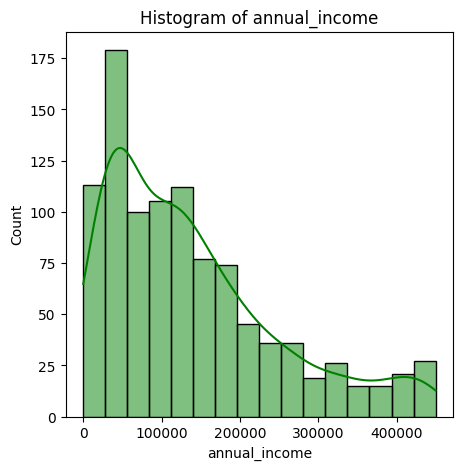

In [38]:
plt.figure(figsize=(5, 5))
sns.histplot(data_cus['annual_income'], kde=True, color='green', label='Data')
plt.title('Histogram of annual_income')
plt.show()

In [41]:
for index, row in data_cus.iterrows():
  if row["annual_income"]<100:
    data_cus.at[index,"annual_income"] = occ_wise_median[row["occupation"]]

In [42]:
data_cus[data_cus.annual_income <100 ]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [43]:
avg_income = data_cus.groupby("occupation")["annual_income"].mean()
avg_income

,annual_income
occupation,
Accountant,64123.562500
Artist,45309.236842
Business Owner,268447.368512
Consultant,60703.154639
Data Scientist,137021.266304
Freelancer,76327.508772
Fullstack Developer,78727.972973


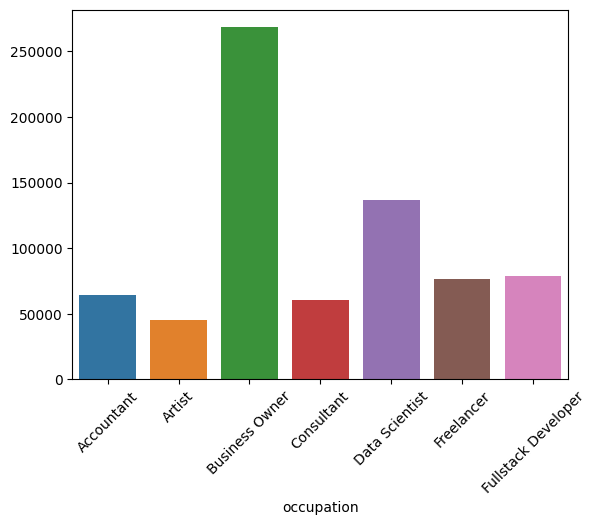

In [50]:
sns.barplot(x=avg_income.index, y= avg_income.values, palette = "tab10")
plt.xticks(rotation = 45)
plt.show()

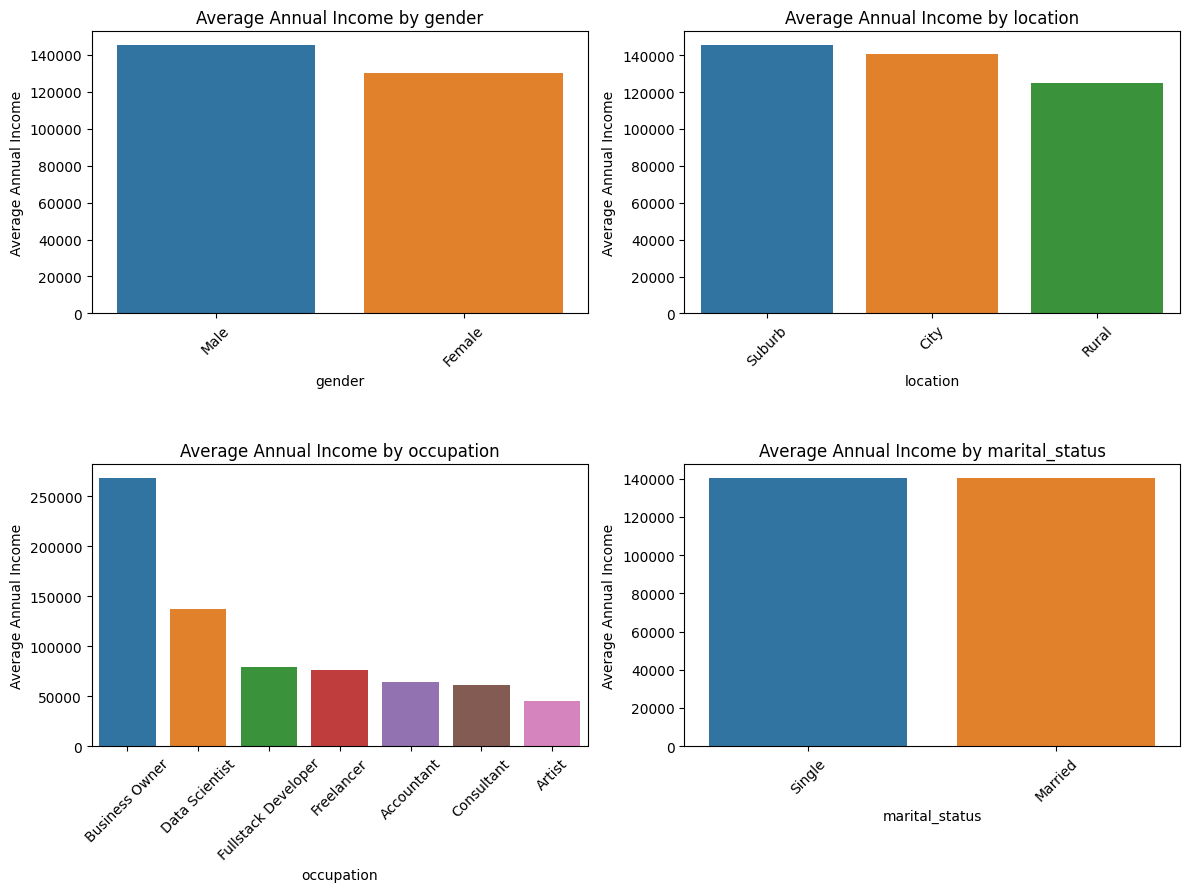

In [53]:
# List of categorical columns
cat_cols = ['gender', 'location', 'occupation', 'marital_status']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_income_by_category = data_cus.groupby(cat_col)['annual_income'].mean().reset_index()

    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_income_by_category.sort_values(by='annual_income', ascending=False)

    sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average Annual Income by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()